In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchvision.datasets.mnist import MNIST

from vit.model import ViT

# Prepare Model and Data

In [30]:
transform = transforms.ToTensor()
train_set = MNIST(root='data/', train=True, download=True, transform=transform)
val_set = MNIST(root='data/', train=False, download=True, transform=transform)

train_loader = DataLoader(train_set, shuffle=True, batch_size=64)
val_loader = DataLoader(train_set, shuffle=False, batch_size=64)

In [31]:
model = ViT(img_size=28, patch_size=2, in_channels=1)

In [42]:
img, label = next(iter(val_loader))

In [33]:
patches = model.patch_embed(img)
print(f'Image : {img.shape}')
print(f'Patch Embeddings {patches.shape}')

Image : torch.Size([64, 1, 28, 28])
Patch Embeddings torch.Size([64, 196, 768])


(28, 28)


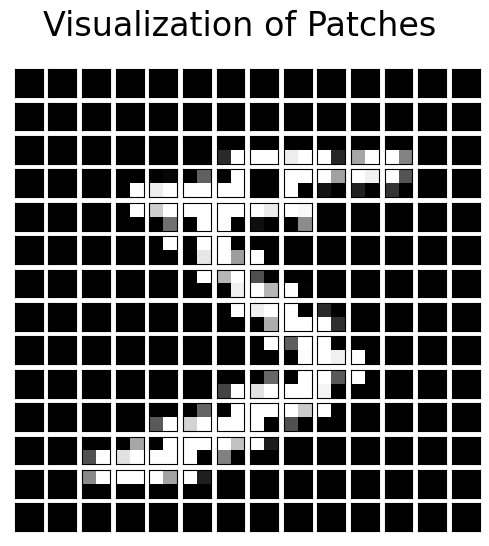

In [43]:
fig = plt.figure(figsize=(6,6))
fig.suptitle("Visualization of Patches", fontsize=24)
img = np.asarray(img[0][0])
print(img.shape)
for i in range(0, 196):
    x = i % 14
    y = i // 14
    patch = img[y*2:(y+1)*2, x*2:(x+1)*2]
    ax = fig.add_subplot(14, 14, i+1)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.imshow(patch, cmap='gray')
fig.savefig('patches.jpg')

In [44]:
pos_embed = model.pos_embed
print(pos_embed.shape)

torch.Size([1, 197, 768])


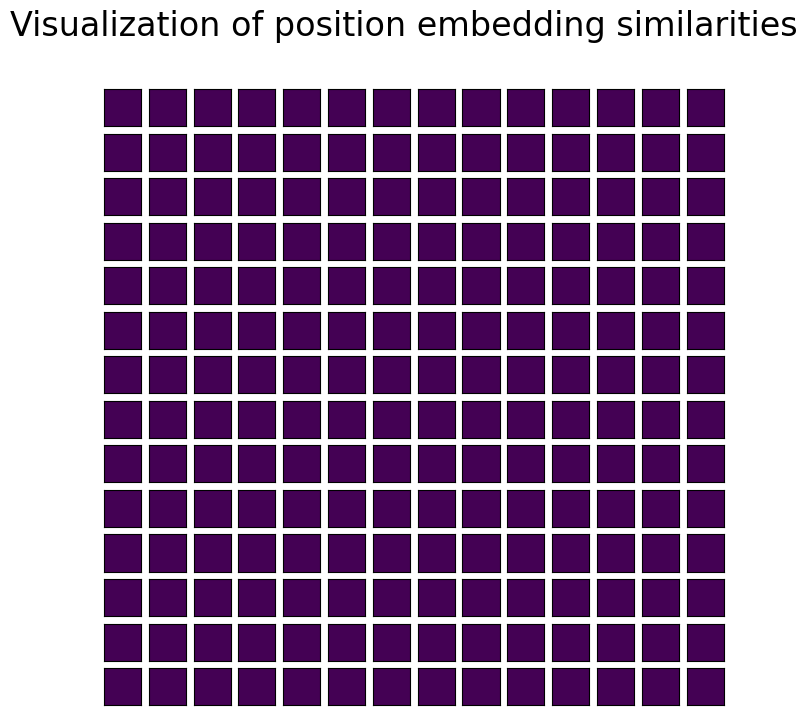

In [45]:
cos = torch.nn.CosineSimilarity(dim=1, eps=1e-6)
fig = plt.figure(figsize=(8, 8))
fig.suptitle("Visualization of position embedding similarities", fontsize=24)
for i in range(1, pos_embed.shape[1]):
    sim = F.cosine_similarity(pos_embed[0, i:i+1], pos_embed[0, 1:], dim=1)
    sim = sim.reshape((14, 14)).detach().cpu().numpy()
    ax = fig.add_subplot(14, 14, i)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.imshow(sim)